In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import os, glob, sys, shutil
#import vissl
import tensorboard
#import apex
import torch
#from vissl.utils.io import load_file
import xarray
import math
import cv2
#from vissl.utils.io import save_file
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
df = pd.read_csv('/p/project/deepacf/kiste/DC/sebastian_graph/CM_metrics_COT_sample_size10000_k_images14_k_patches500_patchsize8_stepsize1.csv')
df

path  cluster  fraction  \
0     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...       14  1.000000   
1     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...       13  0.994385   
2     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        9  1.000000   
3     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6  0.276062   
4     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...       12  0.275635   
...                                                 ...      ...       ...   
9995  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...       13  0.999939   
9996  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6  0.032471   
9997  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...       10  0.931458   
9998  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4  0.979370   
9999  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...       10  0.857422   

      open sky mean  orientation  mean length scale      iOrg  
0               inf     0.197764           1.914854  0.740649  
1         95.520232     0.311044           2.559811  0.684999  
2               inf     0.328224           2.730995  0.592915  
3          1.381334     0.732222                NaN       NaN  
4          1.380519     0.820546                NaN       NaN  
...             ...          ...                ...       ...  
9995    8555.545715     0.344940           3.283688  0.726825  
9996       1.033560     0.984391                NaN       NaN  
9997      14.589492     0.709353                NaN       NaN  
9998      48.473373     0.365388                NaN       NaN  
9999       5.914973     0.744546           4.881940  0.661845  

[10000 rows x 7 columns]

In [32]:
df1 = pd.read_csv('/Users/sz/Documents/Uni/Master/Masterarbeit/Masterarbeit_Projekt/ImageClusteringMain/clustering_results/cot/COT_metrics_sample_size10000_k_images7_k_patches500_patchsize8_stepsize1.csv')
#/p/project/deepacf/kiste/DC/sebastian_graph/COT_metrics_sample_size10000_k_images14_k_patches500_patchsize8_stepsize1.csv
df1

path  cluster  center  \
0     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       6   
1     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       4   
2     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       7   
3     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        3       3   
4     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
...                                                 ...      ...     ...   
9995  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       0   
9996  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        1       0   
9997  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9998  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9999  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   

      fraction  mean length scale  max length scale      iOrg       cot  
0     0.781616          23.099423        111.507847  0.674320  0.491966  
1     0.059937           9.046178         20.124612  0.712769  0.107839  
2     0.306702          13.396428         68.293484  0.775505  0.215089  
3     0.577271          14.661328         93.898882  0.624120  0.466323  
4     0.954895          51.063686        125.035995  0.829166  0.620240  
...        ...                ...               ...       ...       ...  
9995  0.213379           6.694812         43.150898  0.685547  0.153437  
9996  0.059509           3.427388         17.175564  0.535238  0.070679  
9997  0.828857          22.854052        116.094789  0.680957  0.501661  
9998  0.980469          63.371918        126.688595  0.746388  0.671515  
9999  0.994690         127.659704        127.659704  0.000000  0.635487  

[10000 rows x 8 columns]

In [33]:
df['path'].values[10], df1['path'].values[10]

NameError: name 'df' is not defined

In [7]:
files = df1['path'].values
cot_mean=[]
ctp_mean=[]
for i in range(len(files)):
    file = str(files[i])
    #file = file[2:len(file)-7]
    file = file.replace('/Users/sz/Documents/Uni/Master/Masterarbeit/Masterarbeit_Projekt/ImageClusteringMain/data/cot/random_10k_cot','/p/scratch/deepacf/kiste/DC/dataset/sep_2022_germany_128_2013/germany_cot_128x128_npy')
    file=file.replace('tif','npy')
    cot_file = np.load(file)
    cot_avg = np.nanmean(cot_file)
    cot_mean.append(cot_avg)
    file=file.replace('scratch/deepacf/kiste/DC/dataset/sep_2022_germany_128_2013/germany_cot_128x128_npy','scratch/deepacf/kiste/DC/dataset/sep_2022_germany_128_2013/germany_ctp_128x128_npy')
    ctp_file = np.load(file)
    ctp_avg = np.nanmean(ctp_file)
    ctp_mean.append(ctp_avg)

    
np.save('/p/project/deepacf/kiste/DC/sebastian_graph/cot_nanmean_new.npy',cot_mean)
np.save('/p/project/deepacf/kiste/DC/sebastian_graph/ctp_nanmean_new.npy',ctp_mean)  

/tmp/ipykernel_13206/3559250261.py:14: RuntimeWarning: Mean of empty slice
  ctp_avg = np.nanmean(ctp_file)


In [10]:
file

'sers/sz/Documents/Uni/Master/Masterarbeit/Masterarbeit_Projekt/ImageClusteringMain/data/cot/random_10k_cot/20130512t0835_german'

In [8]:
files = df1['path'].values
cot_mean=[]
ctp_mean=[]
for i in range(len(files)):
    file = str(files[i])
    #file = file[2:len(file)-7]
    file = file.replace('/Users/sz/Documents/Uni/Master/Masterarbeit/Masterarbeit_Projekt/ImageClusteringMain/data/cot/random_10k_cot','/p/scratch/deepacf/kiste/DC/dataset/sep_2022_germany_128_2013/germany_sds_128x128_npy')
    file=file.replace('tif','npy')
    cot_file = np.load(file)
    cot_avg = np.nanmean(cot_file)
    cot_mean.append(cot_avg)
    file=file.replace('scratch/deepacf/kiste/DC/dataset/sep_2022_germany_128_2013/germany_sds_128x128_npy','scratch/deepacf/kiste/DC/dataset/sep_2022_germany_128_2013/germany_trs_128x128_npy')
    ctp_file = np.load(file)
    ctp_avg = np.nanmean(ctp_file)
    ctp_mean.append(ctp_avg)
    
np.save('/p/project/deepacf/kiste/DC/sebastian_graph/sds_nanmean_new.npy',cot_mean)
np.save('/p/project/deepacf/kiste/DC/sebastian_graph/trs_nanmean_new.npy',ctp_mean) 

In [9]:
len(cot_mean)

10000

In [3]:
sds = np.load('/p/project/deepacf/kiste/DC/sebastian_graph/sds_nanmean_new.npy')
trs = np.load('/p/project/deepacf/kiste/DC/sebastian_graph/trs_nanmean_new.npy')
cot = np.load('/p/project/deepacf/kiste/DC/sebastian_graph/cot_nanmean_new.npy')
ctp = np.load('/p/project/deepacf/kiste/DC/sebastian_graph/ctp_nanmean_new.npy')

df1['sds_mean'],df1['trs_mean'],df1['cot_mean'],df1['ctp_mean'] = sds, trs, cot, ctp
df1.to_csv('/p/project/deepacf/kiste/DC/sebastian_graph/10k_physical_metrics_new.csv', index = False)

In [34]:
df1 = pd.read_csv('/Users/sz/Documents/Uni/Master/Masterarbeit/Masterarbeit_Projekt/ImageClusteringMain/clustering_results/cot/10k_physical_metrics_COT_k7.csv')
df1

path  cluster  center  \
0     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       6   
1     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       4   
2     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       7   
3     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        3       3   
4     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
...                                                 ...      ...     ...   
9995  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       0   
9996  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        1       0   
9997  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9998  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9999  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   

      fraction  mean length scale  max length scale      iOrg       cot  \
0     0.781616          23.099423        111.507847  0.674320  0.491966   
1     0.059937           9.046178         20.124612  0.712769  0.107839   
2     0.306702          13.396428         68.293484  0.775505  0.215089   
3     0.577271          14.661328         93.898882  0.624120  0.466323   
4     0.954895          51.063686        125.035995  0.829166  0.620240   
...        ...                ...               ...       ...       ...   
9995  0.213379           6.694812         43.150898  0.685547  0.153437   
9996  0.059509           3.427388         17.175564  0.535238  0.070679   
9997  0.828857          22.854052        116.094789  0.680957  0.501661   
9998  0.980469          63.371918        126.688595  0.746388  0.671515   
9999  0.994690         127.659704        127.659704  0.000000  0.635487   

        sds_mean   trs_mean   cot_mean   ctp_mean  
0     468.974800  466.34130  19.783886  718.65620  
1     609.124450  213.25739   1.022087  248.01220  
2     487.798980  243.35013   3.029031  523.39246  
3      55.780075  137.55615  40.075096  428.60458  
4      97.928650  308.24854  27.549982  708.11010  
...          ...        ...        ...        ...  
9995  345.410680  172.10034   4.732044  731.87305  
9996  291.654750  128.63930   1.427174  767.06840  
9997  220.882610  345.41100  20.829384  640.48480  
9998  197.831050  520.57117  38.556087  741.41180  
9999  231.122040  538.41455  26.600296  600.70483  

[10000 rows x 12 columns]

In [35]:
max(df1['cluster']), min(df1['cluster'])

(7, 1)

In [36]:
colors_per_class1 = {
    '1' : [254, 202, 87],
    '2' : [255, 107, 107],
    '3' : [10, 189, 227],
    '4' : [255, 159, 243],
    '5' : [16, 172, 132],
    '6' : [128, 80, 128],
    '7' : [87, 101, 116],
    # '8' : [52, 31, 151],
    # '9' : [0, 0, 0],
    # '10' : [100, 100, 255],
    # '11' : [202, 240, 248], 
    # '12' : [192, 192, 192],
    # '13' : [255, 183, 3],
    # '14' : [142, 202, 230],
    }

In [37]:
df1['label'] = df1['cluster'].apply(lambda i: str(i))
df_main2 = df1

labels_dfmain2 = df1['label']
max(labels_dfmain2),min(labels_dfmain2)

('7', '1')

In [38]:
df1.head(15)

path  cluster  center  \
0   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       6   
1   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       4   
2   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       7   
3   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        3       3   
4   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
5   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
6   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       0   
7   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        5       5   
8   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       0   
9   /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        1       1   
10  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       0   
11  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        1       0   
12  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        2       2   
13  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
14  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        5       0   

    fraction  mean length scale  max length scale      iOrg       cot  \
0   0.781616          23.099423        111.507847  0.674320  0.491966   
1   0.059937           9.046178         20.124612  0.712769  0.107839   
2   0.306702          13.396428         68.293484  0.775505  0.215089   
3   0.577271          14.661328         93.898882  0.624120  0.466323   
4   0.954895          51.063686        125.035995  0.829166  0.620240   
5   0.974304         126.344766        126.344766  0.000000  0.569793   
6   0.269165           8.366600         45.431267  0.576562  0.242930   
7   0.781067          20.653490        106.681770  0.666547  0.449840   
8   0.270569           8.742484         39.255573  0.560253  0.230104   
9   0.021545           4.099942         14.899664  0.800064  0.024841   
10  0.217834           6.808131         39.924930  0.686562  0.171512   
11  0.000427           2.645751          2.645751  0.000000  0.008057   
12  0.438599           5.529803         51.923020  0.447072  0.274500   
13  0.832153          24.894322        115.117331  0.782430  0.523490   
14  0.597656          32.984845         98.787651  0.339806  0.385603   

      sds_mean   trs_mean   cot_mean   ctp_mean label  
0   468.974800  466.34130  19.783886  718.65620     6  
1   609.124450  213.25739   1.022087  248.01220     4  
2   487.798980  243.35013   3.029031  523.39246     7  
3    55.780075  137.55615  40.075096  428.60458     3  
4    97.928650  308.24854  27.549982  708.11010     6  
5   222.524840  455.81020  22.177147  549.24976     6  
6   267.799680  240.26060   4.162964  227.18805     7  
7   336.681100  398.88700  13.418573  398.87708     5  
8   142.618040  155.55250   5.941552  457.74582     7  
9   221.435520  119.12920   0.271960  897.99744     1  
10  697.143550  273.51935   2.458945  399.27420     7  
11  794.566830  162.44228   0.052898  328.02710     1  
12  770.350100  305.04193   3.736847  785.90375     2  
13  469.359800  508.86945  23.458130  740.12380     6  
14  519.597300  483.03345  14.788522  354.41025     5

In [17]:
x_128 = [len(df_main2.loc[df_main2['label']=='1']),
         len(df_main2.loc[df_main2['label']=='2']),
         len(df_main2.loc[df_main2['label']=='3']),
         len(df_main2.loc[df_main2['label']=='4']),
         len(df_main2.loc[df_main2['label']=='5']),
         len(df_main2.loc[df_main2['label']=='6']),
         len(df_main2.loc[df_main2['label']=='7']),
         len(df_main2.loc[df_main2['label']=='8']),
         len(df_main2.loc[df_main2['label']=='9']),
         len(df_main2.loc[df_main2['label']=='10']),
         len(df_main2.loc[df_main2['label']=='11']),
         len(df_main2.loc[df_main2['label']=='12']),
         len(df_main2.loc[df_main2['label']=='13']),
         len(df_main2.loc[df_main2['label']=='14'])]


x_128 = [i/len(df_main2) * 100 for i in x_128]

f_ticks=22
f_label=25
f_title=27
fig, ax = plt.subplots(1, 1, figsize=(7, 7)) #,constrained_layout=True
#fig.suptitle('Number of images in each class',fontsize =f_title-2)

for label in colors_per_class1:
    x_ = int(label)
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    
    ax.bar(x_,x_128[int(label)-1], color=color,label=int(label))

    ax.legend(loc=(0.85,0.45)) 
    
ax.set_ylabel('relative percentage', fontsize=f_label-5)
ax.set_xlabel('classes', fontsize=f_label)
ax.xaxis.set_label_coords(1.01, -.1)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14], fontsize = f_ticks)
ax.set_yticklabels([0,5,10,15,20,25,35], fontsize = f_ticks)
#ax.set_title('CTP retrievals', fontsize = f_label)
ax.xaxis.set_label_coords(0.5, -0.055)

fig.savefig('/p/project/deepacf/kiste/DC/sebastian_graph/10k_classwise_relativepercent_new.jpeg')

/tmp/ipykernel_13206/2953516145.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array([colors_per_class1[label]], dtype=np.float) / 255
/tmp/ipykernel_13206/2953516145.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,5,10,15,20,25,35], fontsize = f_ticks)


In [39]:
df_main2

path  cluster  center  \
0     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       6   
1     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       4   
2     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       7   
3     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        3       3   
4     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
...                                                 ...      ...     ...   
9995  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       0   
9996  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        1       0   
9997  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9998  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9999  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   

      fraction  mean length scale  max length scale      iOrg       cot  \
0     0.781616          23.099423        111.507847  0.674320  0.491966   
1     0.059937           9.046178         20.124612  0.712769  0.107839   
2     0.306702          13.396428         68.293484  0.775505  0.215089   
3     0.577271          14.661328         93.898882  0.624120  0.466323   
4     0.954895          51.063686        125.035995  0.829166  0.620240   
...        ...                ...               ...       ...       ...   
9995  0.213379           6.694812         43.150898  0.685547  0.153437   
9996  0.059509           3.427388         17.175564  0.535238  0.070679   
9997  0.828857          22.854052        116.094789  0.680957  0.501661   
9998  0.980469          63.371918        126.688595  0.746388  0.671515   
9999  0.994690         127.659704        127.659704  0.000000  0.635487   

        sds_mean   trs_mean   cot_mean   ctp_mean label  
0     468.974800  466.34130  19.783886  718.65620     6  
1     609.124450  213.25739   1.022087  248.01220     4  
2     487.798980  243.35013   3.029031  523.39246     7  
3      55.780075  137.55615  40.075096  428.60458     3  
4      97.928650  308.24854  27.549982  708.11010     6  
...          ...        ...        ...        ...   ...  
9995  345.410680  172.10034   4.732044  731.87305     4  
9996  291.654750  128.63930   1.427174  767.06840     1  
9997  220.882610  345.41100  20.829384  640.48480     6  
9998  197.831050  520.57117  38.556087  741.41180     6  
9999  231.122040  538.41455  26.600296  600.70483     6  

[10000 rows x 13 columns]

In [40]:
def Average(lst):
    return sum(lst) / len(lst)

def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

def compute_plot_coordinates(image, x, y, image_centers_area_size, offset):
    image_height, image_width, _ = image.shape

    # compute the image center coordinates on the plot
    center_x = int(image_centers_area_size * x) + offset

    # in matplotlib, the y axis is directed upward
    # to have the same here, we need to mirror the y coordinate
    center_y = int(image_centers_area_size * (1 - y)) + offset

    # knowing the image center, compute the coordinates of the top left and bottom right corner
    tl_x = center_x - int(image_width / 2)
    tl_y = center_y - int(image_height / 2)

    br_x = tl_x + image_width
    br_y = tl_y + image_height

    return tl_x, tl_y, br_x, br_y

def scale_image(image, max_image_size):
    image_height, image_width, _ = image.shape

    scale = max(1, image_width / max_image_size, image_height / max_image_size)
    image_width = int(image_width / scale)
    image_height = int(image_height / scale)

    image = cv2.resize(image, (image_width, image_height))
    return image

def draw_rectangle_by_class(image, label):
    image_height, image_width, _ = image.shape

    # get the color corresponding to image class
    color = colors_per_class1[label]
    image = cv2.rectangle(image, (0, 0), (image_width - 1, image_height - 1), color=color, thickness=5)

    return image

plot_size=1000
max_image_size=100

offset = max_image_size // 2
image_centers_area_size = plot_size - 2 * offset

tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)

ctt,ctt_mean = [],[]  # sds = ctt
cth,cth_mean = [],[]  # trs = cth
std_mean_ctt, std_mean_cth = [],[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    if label == '1':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        ctt_distance = np.linalg.norm(current_tx - Average(current_tx))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '2':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '3':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '4':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '5':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '6':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '7':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '8':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        ctt_distance = np.linalg.norm(current_tx - Average(current_tx))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '9':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '10':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '11':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '12':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '13':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '14':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance

In [66]:
df_main2

path  cluster  center  \
0     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       6   
1     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       4   
2     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        7       7   
3     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        3       3   
4     /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
...                                                 ...      ...     ...   
9995  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        4       0   
9996  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        1       0   
9997  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9998  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   
9999  /Users/sz/Documents/Uni/Master/Masterarbeit/Ma...        6       0   

      fraction  mean length scale  max length scale      iOrg       cot  \
0     0.781616          23.099423        111.507847  0.674320  0.491966   
1     0.059937           9.046178         20.124612  0.712769  0.107839   
2     0.306702          13.396428         68.293484  0.775505  0.215089   
3     0.577271          14.661328         93.898882  0.624120  0.466323   
4     0.954895          51.063686        125.035995  0.829166  0.620240   
...        ...                ...               ...       ...       ...   
9995  0.213379           6.694812         43.150898  0.685547  0.153437   
9996  0.059509           3.427388         17.175564  0.535238  0.070679   
9997  0.828857          22.854052        116.094789  0.680957  0.501661   
9998  0.980469          63.371918        126.688595  0.746388  0.671515   
9999  0.994690         127.659704        127.659704  0.000000  0.635487   

        sds_mean   trs_mean   cot_mean   ctp_mean label  mean_distance  
0     468.974800  466.34130  19.783886  718.65620     6     218.905165  
1     609.124450  213.25739   1.022087  248.01220     4      51.912512  
2     487.798980  243.35013   3.029031  523.39246     7      38.482096  
3      55.780075  137.55615  40.075096  428.60458     3     288.447060  
4      97.928650  308.24854  27.549982  708.11010     6     232.226208  
...          ...        ...        ...        ...   ...            ...  
9995  345.410680  172.10034   4.732044  731.87305     4     214.994595  
9996  291.654750  128.63930   1.427174  767.06840     1     300.052033  
9997  220.882610  345.41100  20.829384  640.48480     6     140.918286  
9998  197.831050  520.57117  38.556087  741.41180     6      64.792970  
9999  231.122040  538.41455  26.600296  600.70483     6      58.648639  

[10000 rows x 14 columns]

In [68]:
min_idx_labels=[]
indices = [i for i, l in enumerate(labels_dfmain2) if l == '1']
df_main2['mean_distance'] = pd.to_numeric(df_main2['mean_distance'])
if label == '1':
    distance = df_main2.loc[indices]['mean_distance']
    minvalueIndexLabel = distance.idxmin()
    min_idx_labels.append(minvalueIndexLabel)

min_idx_labels

[]

In [41]:
min_idx_labels=[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    df_main2['mean_distance'] = pd.to_numeric(df_main2['mean_distance'])
    if label == '1':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '2':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '3':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '4':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '5':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '6':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '7':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '8':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '9':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '10':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '11':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '12':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '13':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '14':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    

In [42]:
min_idx_labels

[nan, 6597, 1104, 2738, 4069, 4463, 2358]

In [43]:
ctt_mean

[0.49619673287231936,
 6.20420600543237,
 20.786622893220347,
 2.273555988955222,
 12.455104266713105,
 27.096432808007446,
 5.985047998204412]

/var/folders/_y/mtwszl9s1yx2ly39m3vzwgnr0000gn/T/ipykernel_1308/491343182.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array([colors_per_class1[label]], dtype=np.float) / 255
/var/folders/_y/mtwszl9s1yx2ly39m3vzwgnr0000gn/T/ipykernel_1308/491343182.py:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array([c

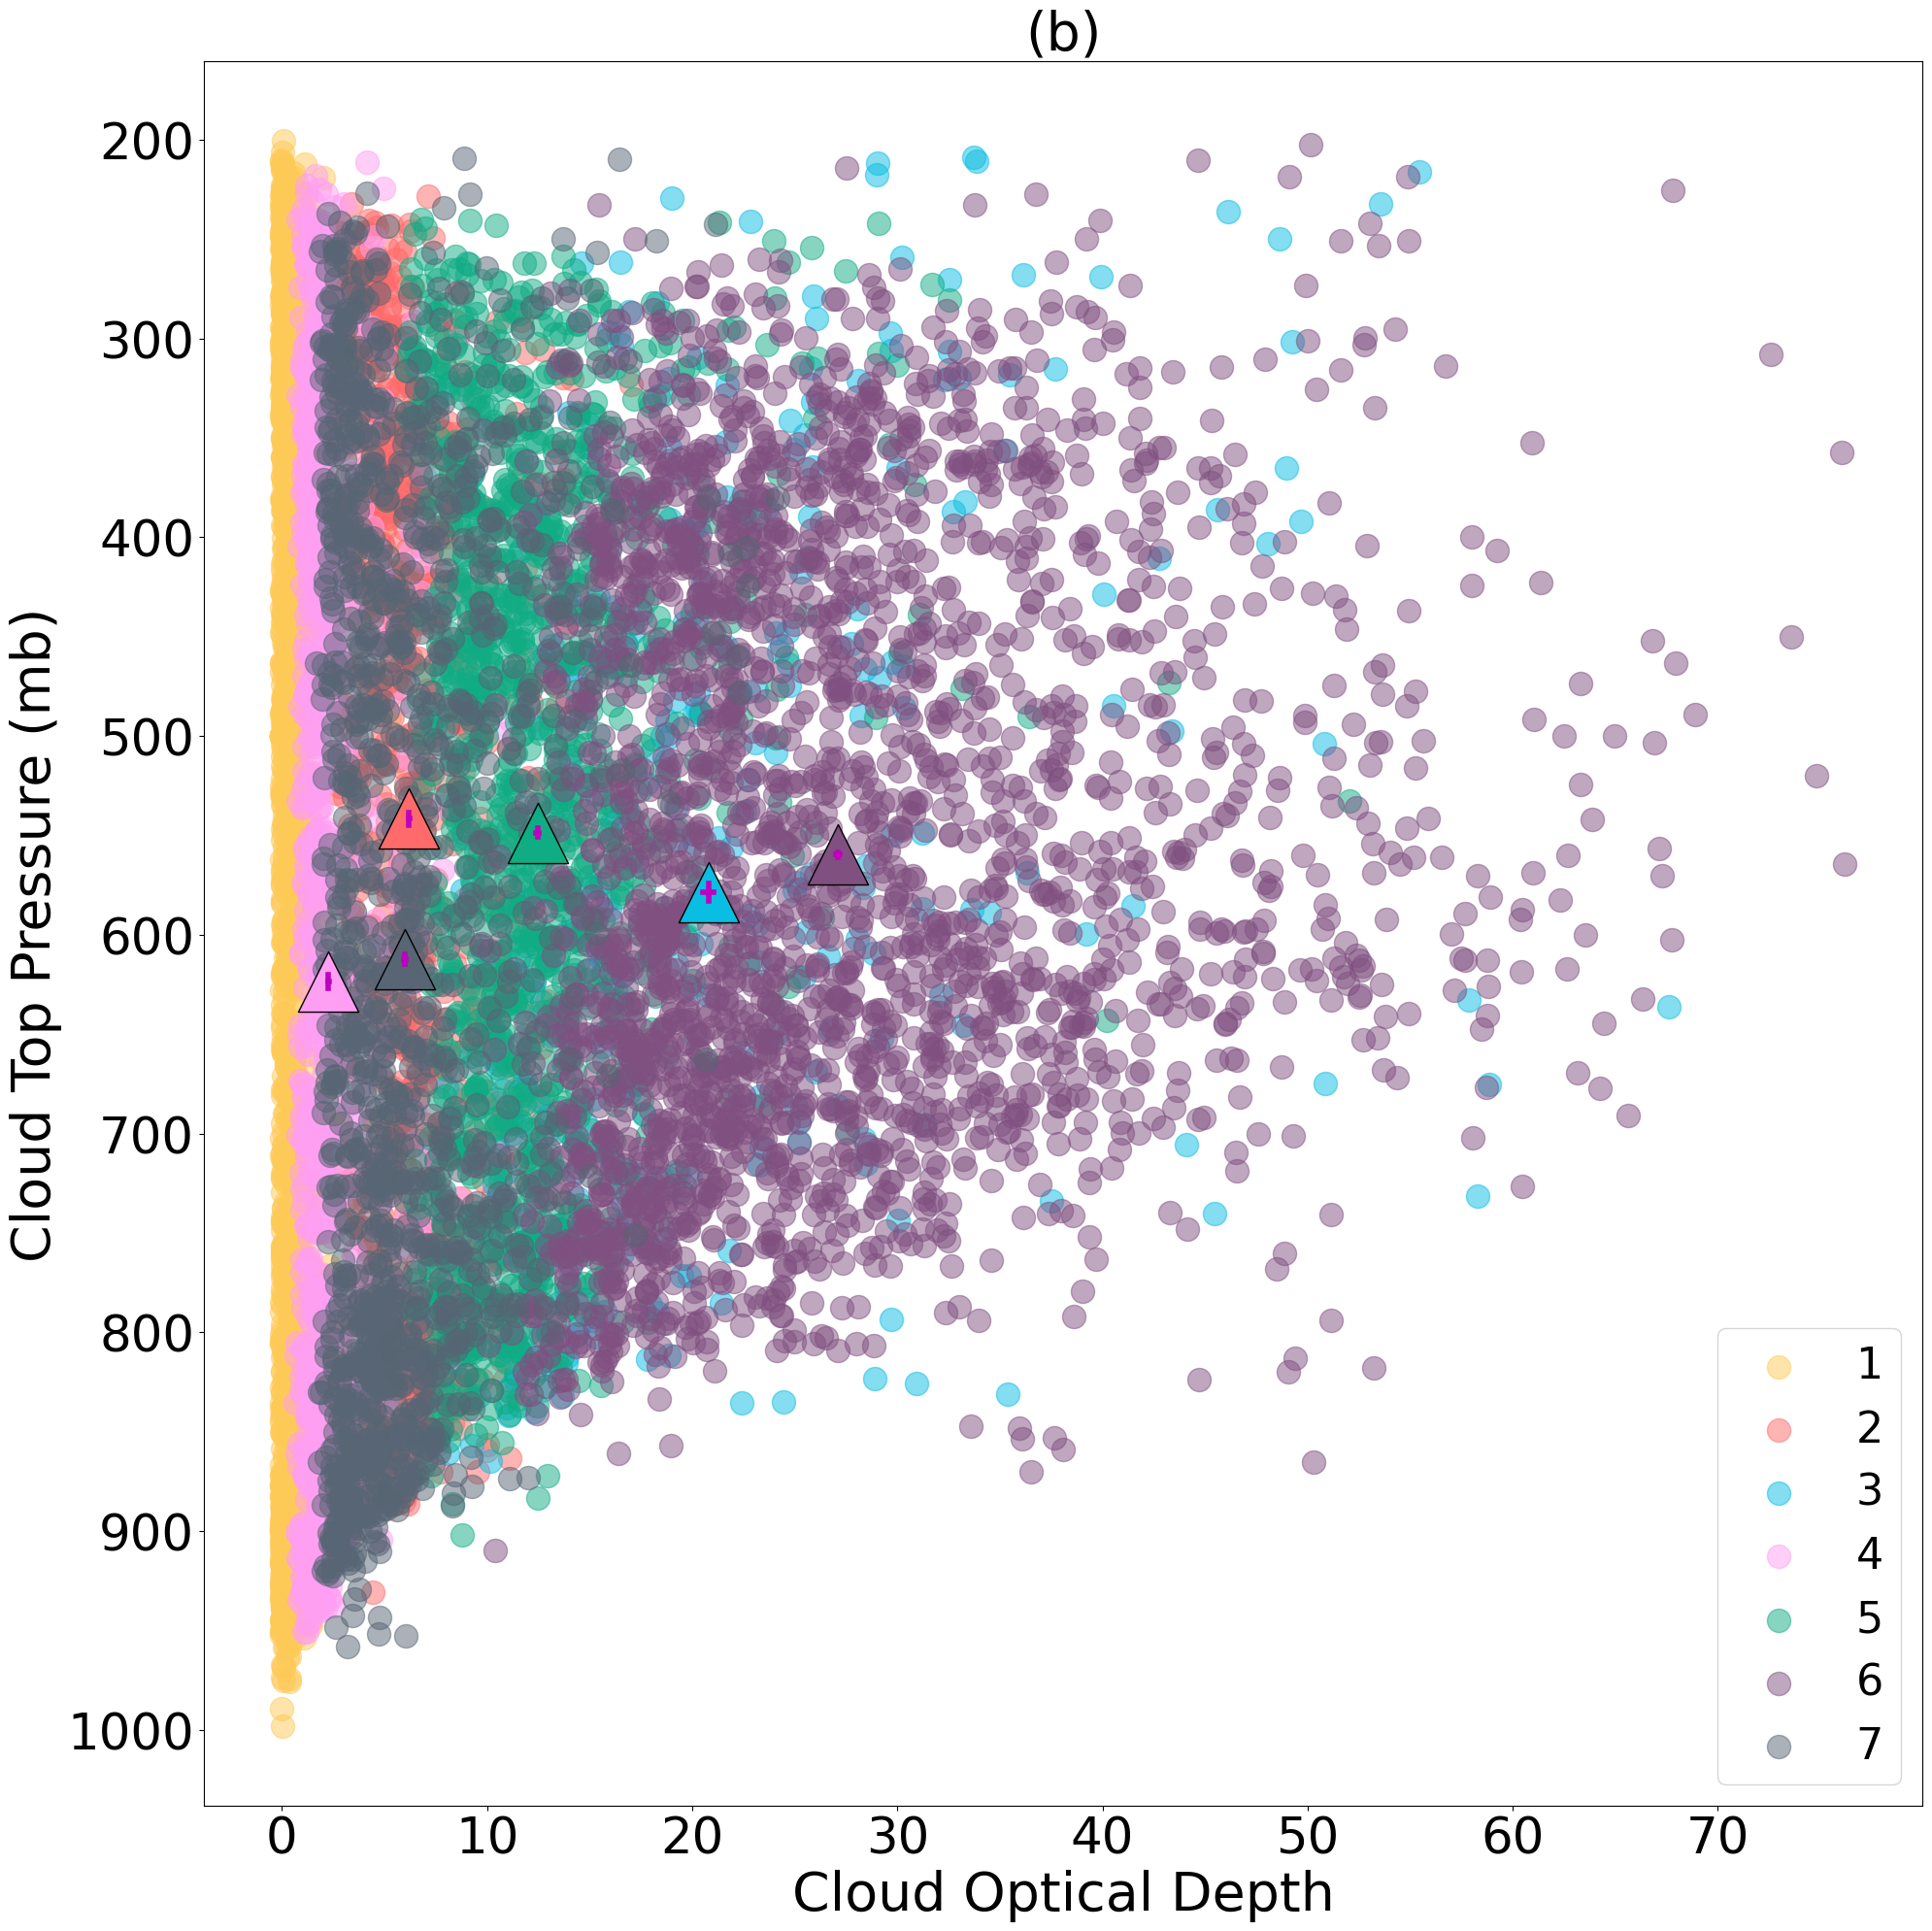

In [71]:
#x_pos =[13,3,13,40,26,46,30,243,233,270]
#y_pos = [260,230,910,750,300,380,850,8020,6700,4000]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    if label != '8':
     
        current_tx = df_main2.iloc[indices]['cot_mean']    # indices are taking care of the correspondence
        current_ty = df_main2.iloc[indices]['ctp_mean']
        color = np.array([colors_per_class1[label]], dtype=np.float) / 255 
        ax.scatter(current_tx, current_ty, c=color, label=int(label), s= 300,alpha=0.5)
        #ax.set_xlim(0,80)
        #ax.set_ylim(200,1000)
        ax.legend(loc='best')
        #ax.scatter(ctt_mean[int(label)], cth_mean[int(label)], c=color, label='_nolegend_', marker='^', s=2000,) # scatter triangle


        x, y = ctt_mean[int(label)-1], cth_mean[int(label)-1]
        endy = y + std_mean_cth[(int(label)-1)] #* math.sin(math.radians(90))
        endx = x + std_mean_ctt[(int(label)-1)] #* math.cos(math.radians(0))
        plt.plot(((x-((x+endx)/2-x)),((x+endx)/2)),(y,y),'m',linewidth=4.0)
        plt.plot((x,x),((y-((y+endy)/2-y)),((y+endy)/2)),'m',linewidth=4.0)#, [y, endy]

        x, y = ctt_mean[int(label)-1], cth_mean[int(label)-1]
        #endx,endy= x_pos[int(label)],y_pos[int(label)]

        #ax.plot([x, endx], [y, endy],'--',color = color[0],linewidth=5)

        #x_loc,y_loc = x_pos[int(label)],y_pos[int(label)]
        #image_path = df_main2.iloc[min_idx_labels[int(label)]]['location']
        #image_path = image_path.replace('train_juelich_128x128_15k','train_juelich_npy_128x128_15k')
        #image = plt.imread(image_path) # cv2.imread(image_path)
        #image = scale_image(image, max_image_size)
        #image = draw_rectangle_by_class(image, label)    
        #offset=OffsetImage(image)
        #ab = AnnotationBbox(offset, (x_loc, y_loc), frameon=False)

        #ax.add_artist(ab)
    
for label in colors_per_class1:
    if label != '8':
        color = np.array([colors_per_class1[label]], dtype=np.float) / 255
        ax.scatter(ctt_mean[int(label)-1], cth_mean[int(label)-1], c=color, label='_nolegend_', marker='^', s=2000,edgecolors='black')
        #ax.set_xlim(0,80)
        #ax.set_ylim(200,1000)

f_title = 40    

plt.legend(prop={'size': 32})
ax.tick_params(axis='both', which='major', labelsize=37)
ax.set_title('(b)',fontsize=f_title)
plt.xlabel('Cloud Optical Depth',fontsize=40)
plt.ylabel('Cloud Top Pressure (mb)',fontsize=40)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fig.savefig('/Users/sz/Documents/Uni/Master/Masterarbeit/Masterarbeit_Projekt/ImageClusteringMain/10k_cod_class_all.jpeg')


In [61]:
current_ty

9       897.99744
11      328.02710
18      287.28754
26      248.79007
27      255.35796
          ...    
9974    391.82767
9980    867.60240
9981    231.03719
9989    943.00530
9996    767.06840
Name: ctp_mean, Length: 2036, dtype: float64

# sds_trs

In [62]:
sds,sds_mean = [],[]
trs,trs_mean = [],[]
std_mean_sds, std_mean_trs = [],[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    if label == '1':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        sds_distance = np.linalg.norm(current_tx - Average(current_tx))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '2':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '3':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '4':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '5':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '6':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '7':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
            
    if label == '8':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        sds_distance = np.linalg.norm(current_tx - Average(current_tx))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '9':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '10':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '11':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '12':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '13':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '14':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
            
min_idx_labels=[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    df_main2['mean_distance'] = pd.to_numeric(df_main2['mean_distance'])
    if label == '1':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '2':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '3':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '4':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '5':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '6':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '7':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '8':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '9':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '10':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '11':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '12':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '13':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '14':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)

/var/folders/_y/mtwszl9s1yx2ly39m3vzwgnr0000gn/T/ipykernel_1308/1153975901.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array([colors_per_class1[label]], dtype=np.float) / 255
/var/folders/_y/mtwszl9s1yx2ly39m3vzwgnr0000gn/T/ipykernel_1308/1153975901.py:51: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array(

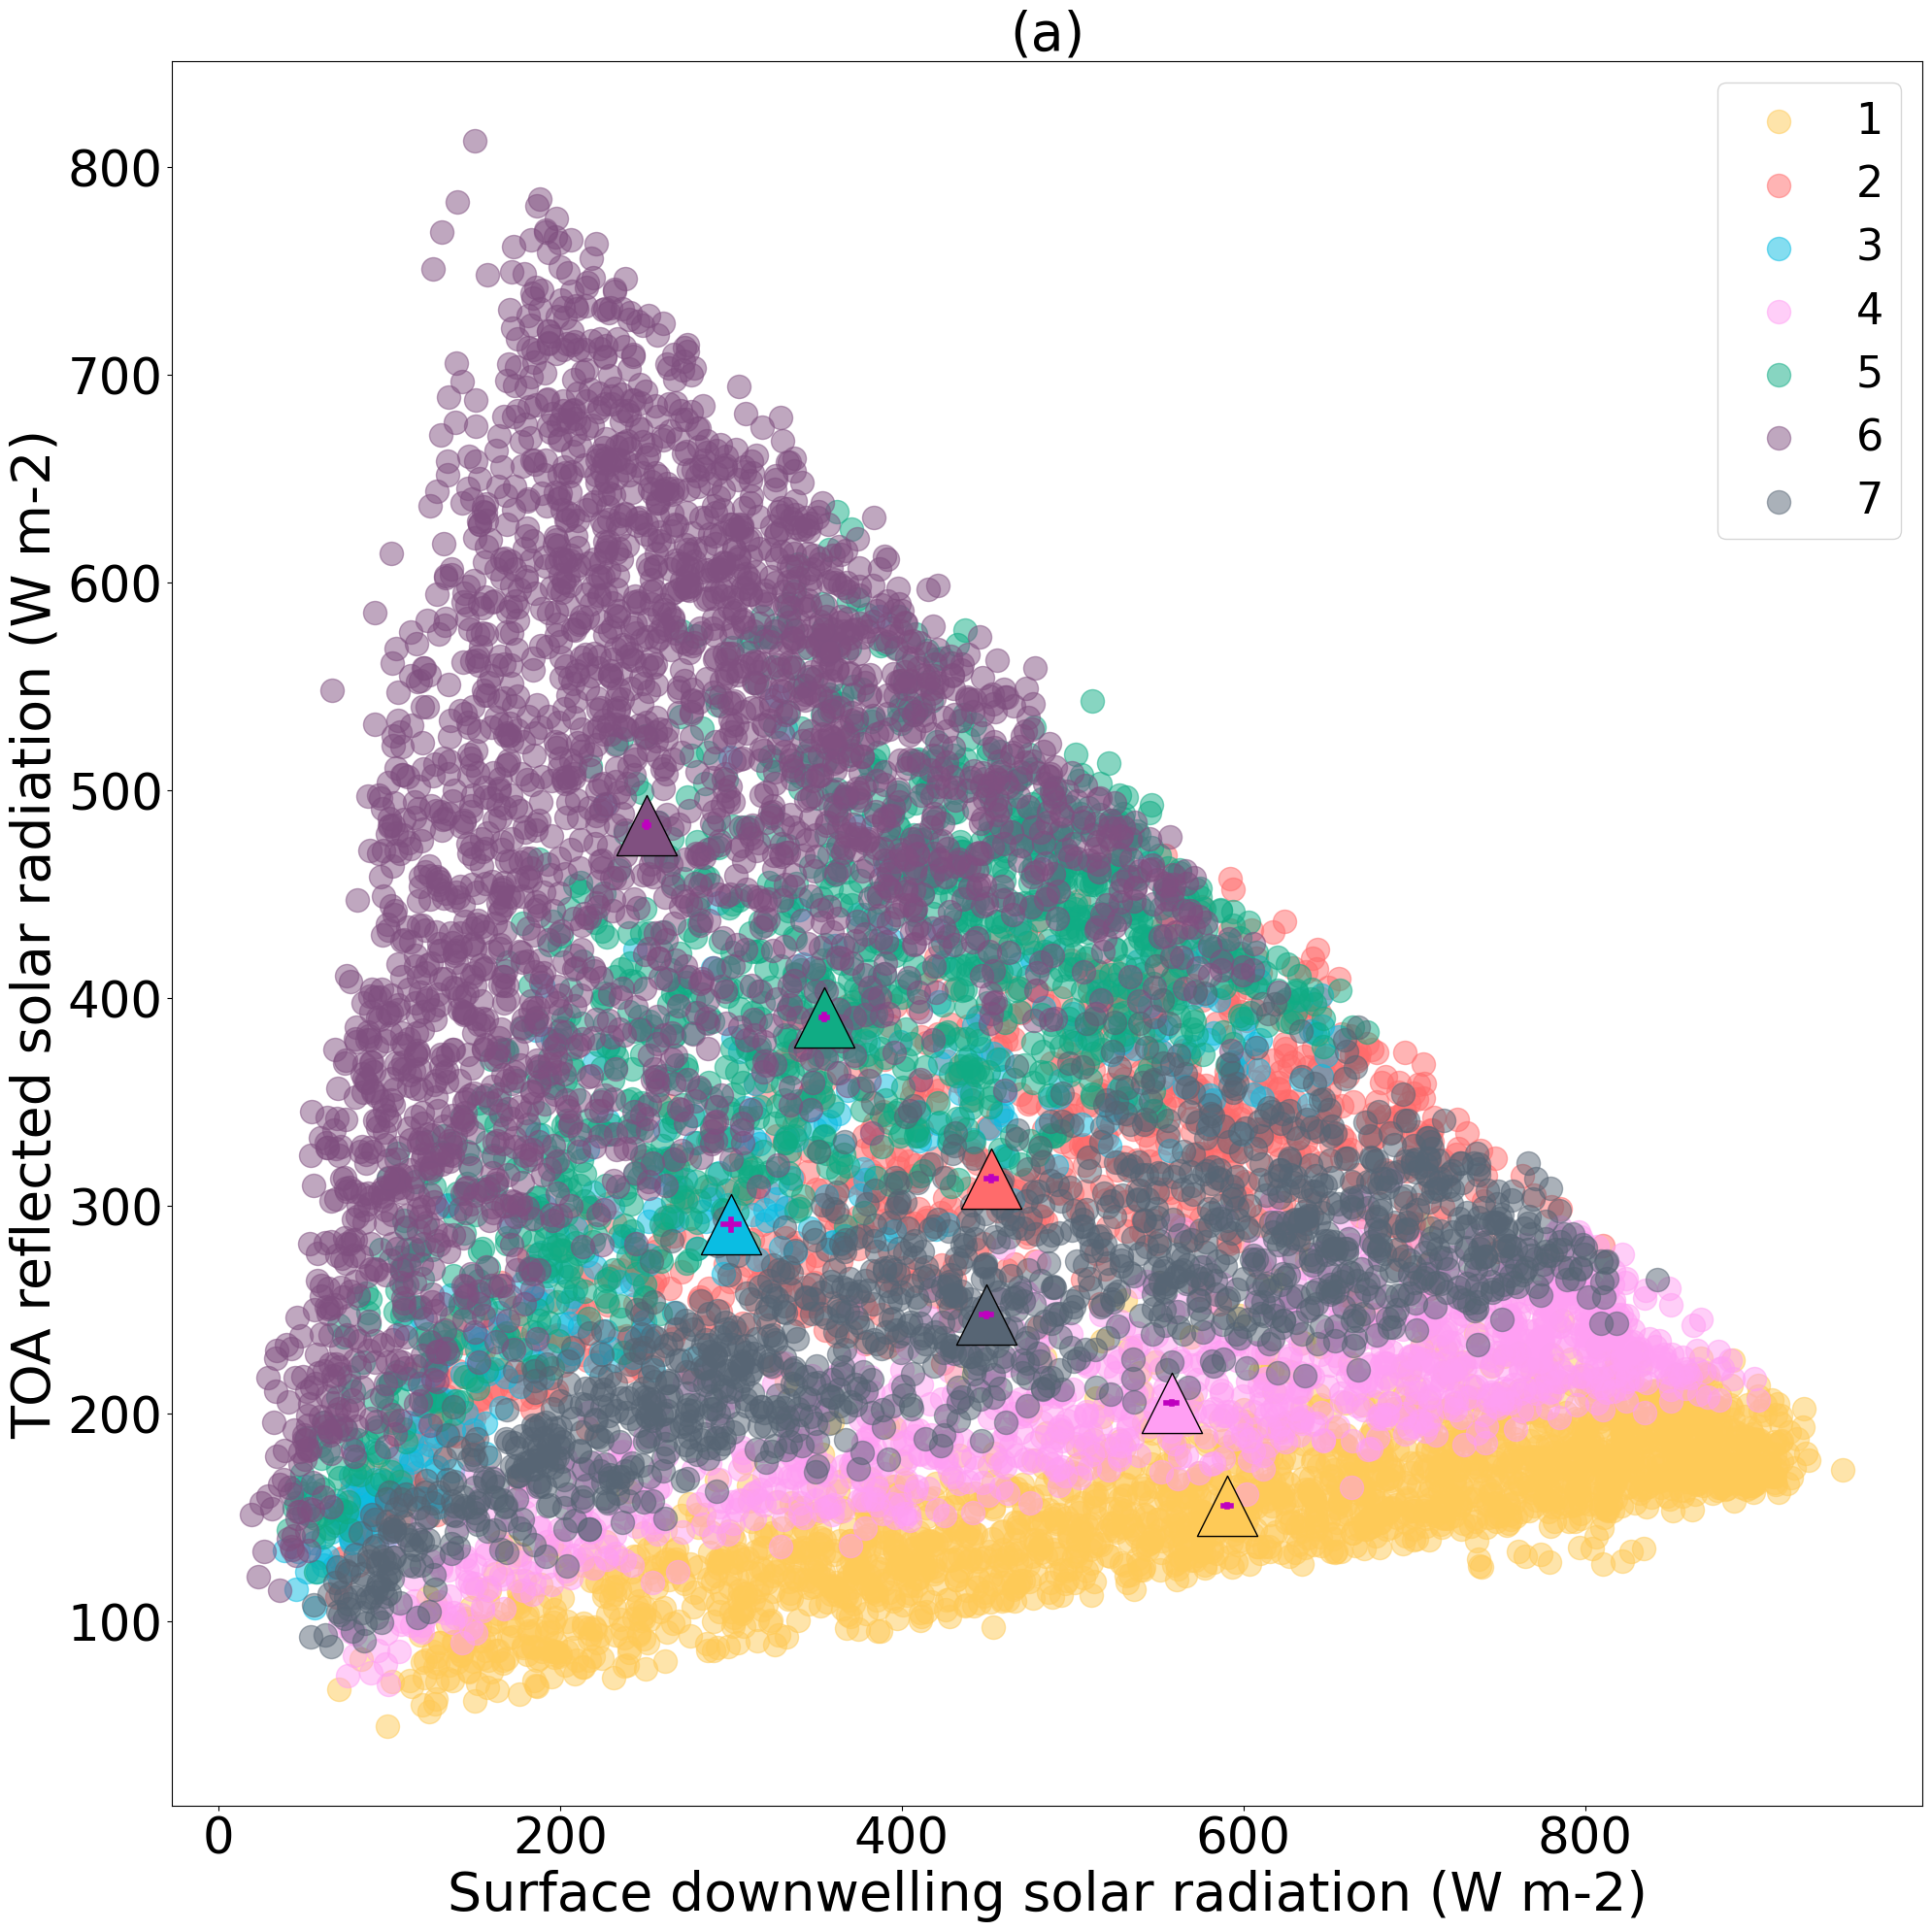

In [70]:
plot_size=1000
max_image_size=100

offset = max_image_size // 2
image_centers_area_size = plot_size - 2 * offset

tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)

#x_pos =[380,520,750,500,320,50,600,450,500,450]
#y_pos = [60,80,400,600,720,520,500,430,350,520]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

#for label in ['2', '7']:
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    
    current_tx = df_main2.iloc[indices]['sds_mean']    # indices are taking care of the correspondence
    current_ty = df_main2.iloc[indices]['trs_mean']
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    ax.scatter(current_tx, current_ty, c=color, label=int(label), s= 300,alpha=0.5)
    ax.legend(loc='best')
    #ax.scatter(sds_mean[int(label)], trs_mean[int(label)], c=color, label='_nolegend_', marker='^', s=2000,)
    
    
    x, y = sds_mean[int(label)-1], trs_mean[int(label)-1]
    endy = y + std_mean_trs[(int(label)-1)] #* math.sin(math.radians(90))
    endx = x + std_mean_sds[(int(label)-1)] #* math.cos(math.radians(0))
    plt.plot(((x-((x+endx)/2-x)),((x+endx)/2)),(y,y),'m',linewidth=4.0)
    plt.plot((x,x),((y-((y+endy)/2-y)),((y+endy)/2)),'m',linewidth=4.0)#, [y, endy]
    
    x, y = sds_mean[int(label)-1], trs_mean[int(label)-1]
    #endx,endy= x_pos[int(label)],y_pos[int(label)]
    #ax.plot([x, endx], [y, endy],'--',color = color[0],linewidth=5)
    
    #x_loc,y_loc = x_pos[int(label)],y_pos[int(label)]
    #image_path = df_main2.iloc[min_idx_labels[int(label)]]['location']

    #image = plt.imread(image_path) # cv2.imread(image_path)
    #image = scale_image(image, max_image_size)
    #image = draw_rectangle_by_class(image, label)
    
        
    #offset=OffsetImage(image)
    #ab = AnnotationBbox(offset, (x_loc, y_loc), frameon=False)    
    #ax.add_artist(ab)

#for label in ['2', '7']:    
for label in colors_per_class1:
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    ax.scatter(sds_mean[int(label)-1], trs_mean[int(label)-1], c=color, label='_nolegend_', marker='^', s=2000,edgecolors='black')
    
#ax.legend(loc='best')
plt.legend(prop={'size': 32})
ax.tick_params(axis='both', which='major', labelsize=37)
ax.set_title('(a)',fontsize=f_title)
plt.xlabel('Surface downwelling solar radiation (W m-2)',fontsize=40)
plt.ylabel('TOA reflected solar radiation (W m-2)',fontsize=40)
plt.tight_layout()
plt.show()
fig.savefig('/Users/sz/Documents/Uni/Master/Masterarbeit/Masterarbeit_Projekt/ImageClusteringMain/10k_cod_sds_trs_k7.jpeg')